In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

**Read** **data**

In [ ]:
data=pd.read_excel("unioncarbide.xls")
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       34 non-null     float64
 1   Y       34 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


**Outliers**

In [ ]:
z=np.abs(stats.zscore(data))
print(z)

[[0.12500664 0.25847285]
 [1.13696519 0.56778404]
 [1.08934361 0.58597881]
 [0.32739835 0.8225109 ]
 [0.52979006 0.51319971]
 [0.27977677 0.00374598]
 [0.73218177 1.3501594 ]
 [0.68456019 0.85890045]
 [1.13696519 0.01444879]
 [0.32739835 0.85890045]
 [0.8869519  1.31376985]
 [1.3393569  1.02265344]
 [0.73218177 2.16892432]
 [0.27977677 0.6876555 ]
 [0.73218177 0.39653909]
 [0.68456019 1.12433013]
 [1.69651874 1.10613535]
 [1.13696519 1.22279597]
 [1.08934361 1.07723776]
 [0.48216848 0.22208329]
 [0.12500664 0.25847285]
 [2.30369386 0.07652509]
 [0.93457348 0.17820178]
 [0.48216848 1.63378385]
 [0.8869519  1.57919952]
 [0.07738507 0.5420973 ]
 [1.49412703 1.96128982]
 [0.52979006 0.32375998]
 [0.73218177 1.21530401]
 [1.69651874 1.72475773]
 [0.27977677 0.07652509]
 [1.94653203 0.46931819]
 [1.13696519 0.71334225]
 [0.73218177 1.01516147]]


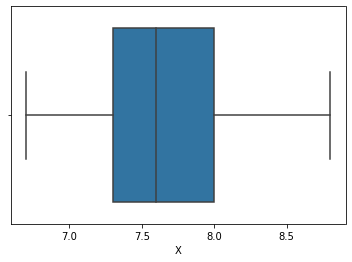

In [ ]:
sns.boxplot(x=data['X'])

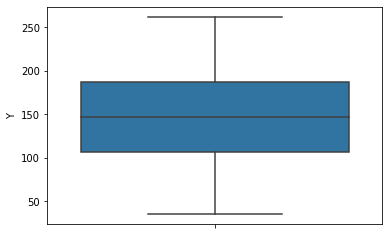

In [ ]:
sns.boxplot(y=data['Y'])

In [ ]:
f_data=data[(z<3).all(axis=1)]
f_data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [ ]:
df=data
for i in df:
  q=df[i].quantile(0.99)
  df[df[i]<q]
  q_low=df[i].quantile(0.01)
  q_hi=df[i].quantile(0.99)
  df_filtered=df[(df[i]<q_hi)&(df[i]>q_low)]
df_filtered.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [ ]:
data=df_filtered
print(len(data))
print(len(df_filtered))
if(len(data)==len(df_filtered)):
  print('No outliers')

32
32
No outliers


**Normalisation**

In [ ]:
data_n=data.copy()
data_n=(data_n-data_n.min())/(data_n.max()-data_n.min())
data_n.head()

,X,Y
0,0.428571,0.644970
1,0.190476,0.745562
2,0.714286,0.751479
3,0.380952,0.828402
4,0.333333,0.727811


**Split Data**

In [ ]:
train_data,test_data=train_test_split(data_n,test_size=0.1)

In [ ]:
print(len(train_data))
train_data.head()

28


,X,Y
7,0.619048,0.840237
21,1.000000,0.585799
13,0.523810,0.337278
32,0.190476,0.792899
1,0.190476,0.745562


In [ ]:
x=np.array(train_data['X'])
y=np.array(train_data['Y'])

**Train** **Data**

In [ ]:
m=1
c=-1
l=0.1   # learning rate
d_m=1
d_c=1
err=[]
epochs=100  #epochs
def derive(m,c,x,y):
  m_d=-1*(y-m*x-c)*x
  c_d=-1*(y-m*x-c)
  return m_d,c_d
for i in range(epochs):
  er=0
  for j in range(len(x)):
    er+=((y[j]-(m*x[j])-c))**2
    pm=m
    pc=c
    d_m,d_c=derive(pm,pc,x[j],y[j])
    d_m=-l*d_m
    d_c=-l*d_c
    m=m+d_m  #Gradiant descent
    c=c+d_c  #Gradiant descent
    er=(1/(2*len(train_data['X'])))*(er)
    err.append(er)
print("The local minimum occurs at m = %.2f"%(m),", c = %.2f"%(c))

The local minimum occurs at m = -0.21 , c = 0.70


**RMSE for Training data**

In [ ]:
train_data_pred=m*train_data['X']+c

In [ ]:
yp=[]
for i in range(len(x)):
  p=(m*x[i])+c
  yp.append(p)
print("Predicted values (yp) : ",yp)

Predicted values (yp) :  [0.5724869828792464, 0.491650650229465, 0.5926960660416917, 0.6634278571102503, 0.6634278571102503, 0.6331142323665823, 0.6634278571102503, 0.521964274973133, 0.521964274973133, 0.582591524460469, 0.5926960660416917, 0.643218773947805, 0.6533233155290277, 0.5522778997168012, 0.643218773947805, 0.5623824412980237, 0.6331142323665823, 0.643218773947805, 0.6028006076229143, 0.6230096907853596, 0.5724869828792464, 0.7038460234351409, 0.673532398691473, 0.6129051492041371, 0.6634278571102503, 0.6230096907853596, 0.5522778997168012, 0.643218773947805]


In [ ]:
sum=0
for i in range(len(x)):
  sum+=(y[i]-yp[i])**2
  mse=sum/len(x)
print("Mean Square Error (MSE) : ",mse)

Mean Square Error (MSE) :  0.07306358363268455


Text(0.5, 1.0, 'Predicted data vs Actual data')

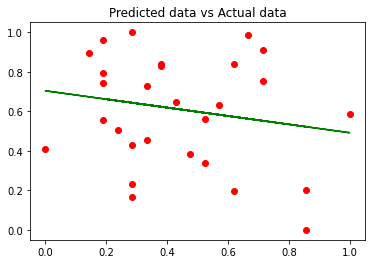

In [ ]:
plt.plot(np.array(train_data['X']),np.array(train_data_pred),'green')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),color='red')
plt.title("Predicted data vs Actual data")

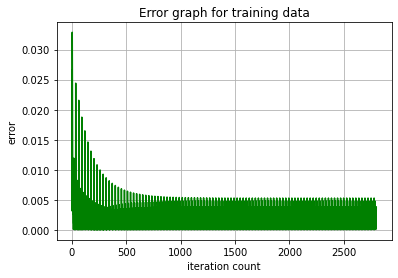

In [ ]:
iters=np.arange(epochs*len(x))
plt.plot(iters,err,'green')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

**Test data**

In [ ]:
x1=np.array(test_data['X'])
y1=np.array(test_data['Y'])

In [ ]:
test_data_pred=m*test_data['X']+c
print(test_data_pred)

20    0.612905
24    0.562382
30    0.592696
23    0.582592
Name: X, dtype: float64


In [ ]:
yp1=[]
for i in range(len(x1)):
  p1=(m*x1[i])+c
  yp1.append(p1)
print("Test data predicted values : ",yp1)

Test data predicted values :  [0.6129051492041371, 0.5623824412980237, 0.5926960660416917, 0.582591524460469]


In [ ]:
sum=0
for i in range(len(x1)):
  sum+=(y1[i]-yp1[i])**2
  mse1=sum/len(x1)
print("Mean Square Error (MSE) : ",mse1)

Mean Square Error (MSE) :  0.14304065149788603


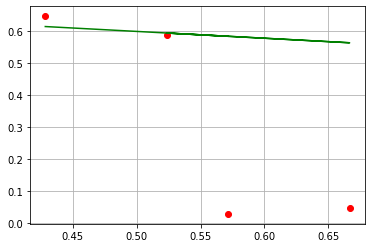

In [ ]:
plt.scatter(test_data['X'],test_data['Y'],color='red')
plt.plot(test_data['X'],test_data_pred,'green')
plt.grid()

In [ ]:
x_min=data['X'].min()
x_max=data['X'].max()
y_min=data['Y'].min()
y_max=data['Y'].max()

In [ ]:
x2=float(input("Enter pH value of well water :"))
xi=(x2-x_min)/(x_max-x_min)
yi=m*xi+c
yi=yi*(y_max-y_min)+y_min
print("Bicarbonates of well water based on its pH {} is : {}".format(x2,yi))

Enter pH value of well water :7.6
Bicarbonates of well water based on its pH 7.6 is : 151.58097021549918
